In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau, pearsonr
from sklearn.preprocessing import StandardScaler
from utils import compute_flatness, compute_local_lipschitz, compute_condition_number
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, pearsonr
from utils import plot_eigen_spectrum

In [2]:
with open("landscape_list_2.pkl", "rb") as f:
    landscape_list = pickle.load(f)

/Users/jwheo/miniconda3/envs/Neural-Quantum-Embedding/lib/python3.9/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.By

In [3]:
data_dict = {}
for i, res in landscape_list.items():
    # 평균 NQE 결과
    ld_mean = np.array(res['NQE_results']).mean()

    # Hessian metrics
    hessian_metrics = compute_flatness(res['hessian'])

    # Fisher 기반 계산
    fisher_flatness = compute_flatness(res['fisher_matrix'])
    fisher_lipschitz = compute_local_lipschitz(res['fisher_matrix'])
    fisher_cond_num = compute_condition_number(res['fisher_matrix'])

    # 저장
    data_dict[i] = {
        'mean_NQE': np.mean(res['NQE_results']),
        'flatness_trace': res['flatness_metrics']['trace'],
        'flatness_max_eig': res['flatness_metrics']['max_eigenvalue'],
        'flatness_avg_eigen': res['flatness_metrics']['average_eigenvalue'],
        'hessian_cond_number': res['cond_number'],
        'local_lipschitz': res['local_lipschitz'],
        'fisher_cond_num': fisher_cond_num,
        'fisher_local_lipschitz': fisher_cond_num,
        'lazy_ratio': res['avg_param_change_ratio'],
        'local_ed': res['local_ed_results']['local_ed'],
        'qntk_cond_num': res['qntk_results']['condition_number'],
        'qntk_eig_entropy': res['qntk_results']['eig_entropy'],
    }

df = pd.DataFrame.from_dict(data_dict, orient='index')

In [4]:
target = 'mean_NQE'

pearson_corr = {}
kendall_corr = {}

for col in df.columns:
    if col != target:
        pearson_corr[col] = pearsonr(df[target], df[col])[0]
        kendall_corr[col] = kendalltau(df[target], df[col])[0]

/Users/jwheo/miniconda3/envs/Neural-Quantum-Embedding/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


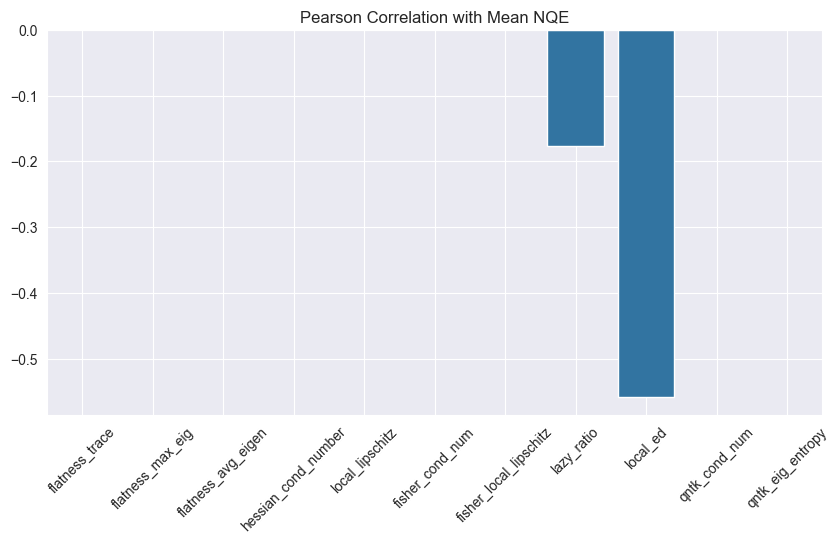

In [5]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(pearson_corr.keys()), y=list(pearson_corr.values()))
plt.xticks(rotation=45)
plt.title('Pearson Correlation with Mean NQE')
plt.grid(True)
plt.show()

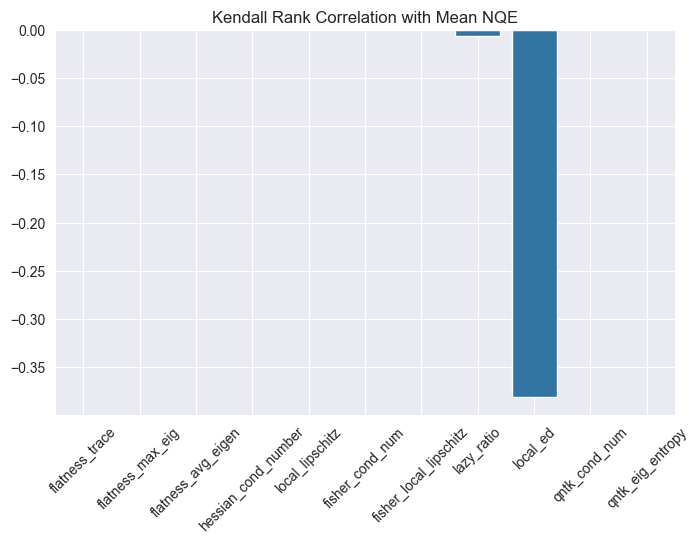

In [6]:
# Kendall Rank Correlation 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=list(kendall_corr.keys()), y=list(kendall_corr.values()))
plt.xticks(rotation=45)
plt.title('Kendall Rank Correlation with Mean NQE')
plt.grid(True)
plt.show()

/Users/jwheo/Desktop/Y/NQE/Neural-Quantum-Embedding/LossLandscape/utils.py:87: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


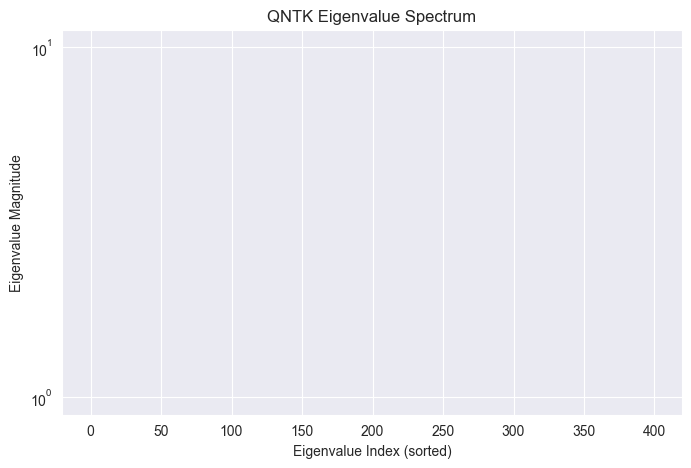

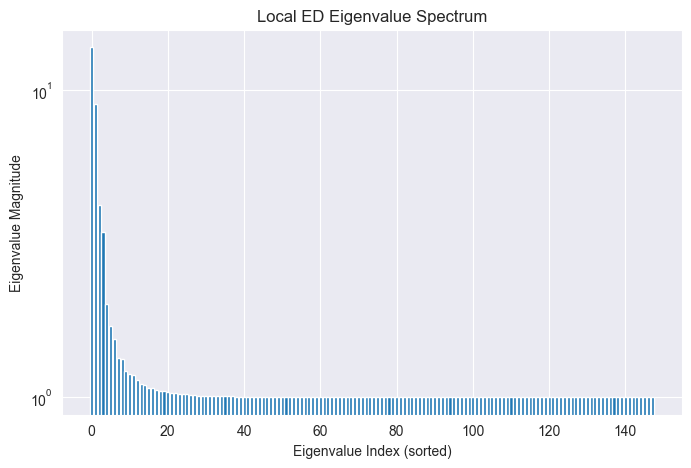

In [7]:
idx_to_analyze = 0  # 원하는 circuit의 index
plot_eigen_spectrum(landscape_list[idx_to_analyze]['qntk_results']['eigenvalues'],
                    title="QNTK Eigenvalue Spectrum")

plot_eigen_spectrum(landscape_list[idx_to_analyze]['local_ed_results']['eigenvalues'],
                    title="Local ED Eigenvalue Spectrum")

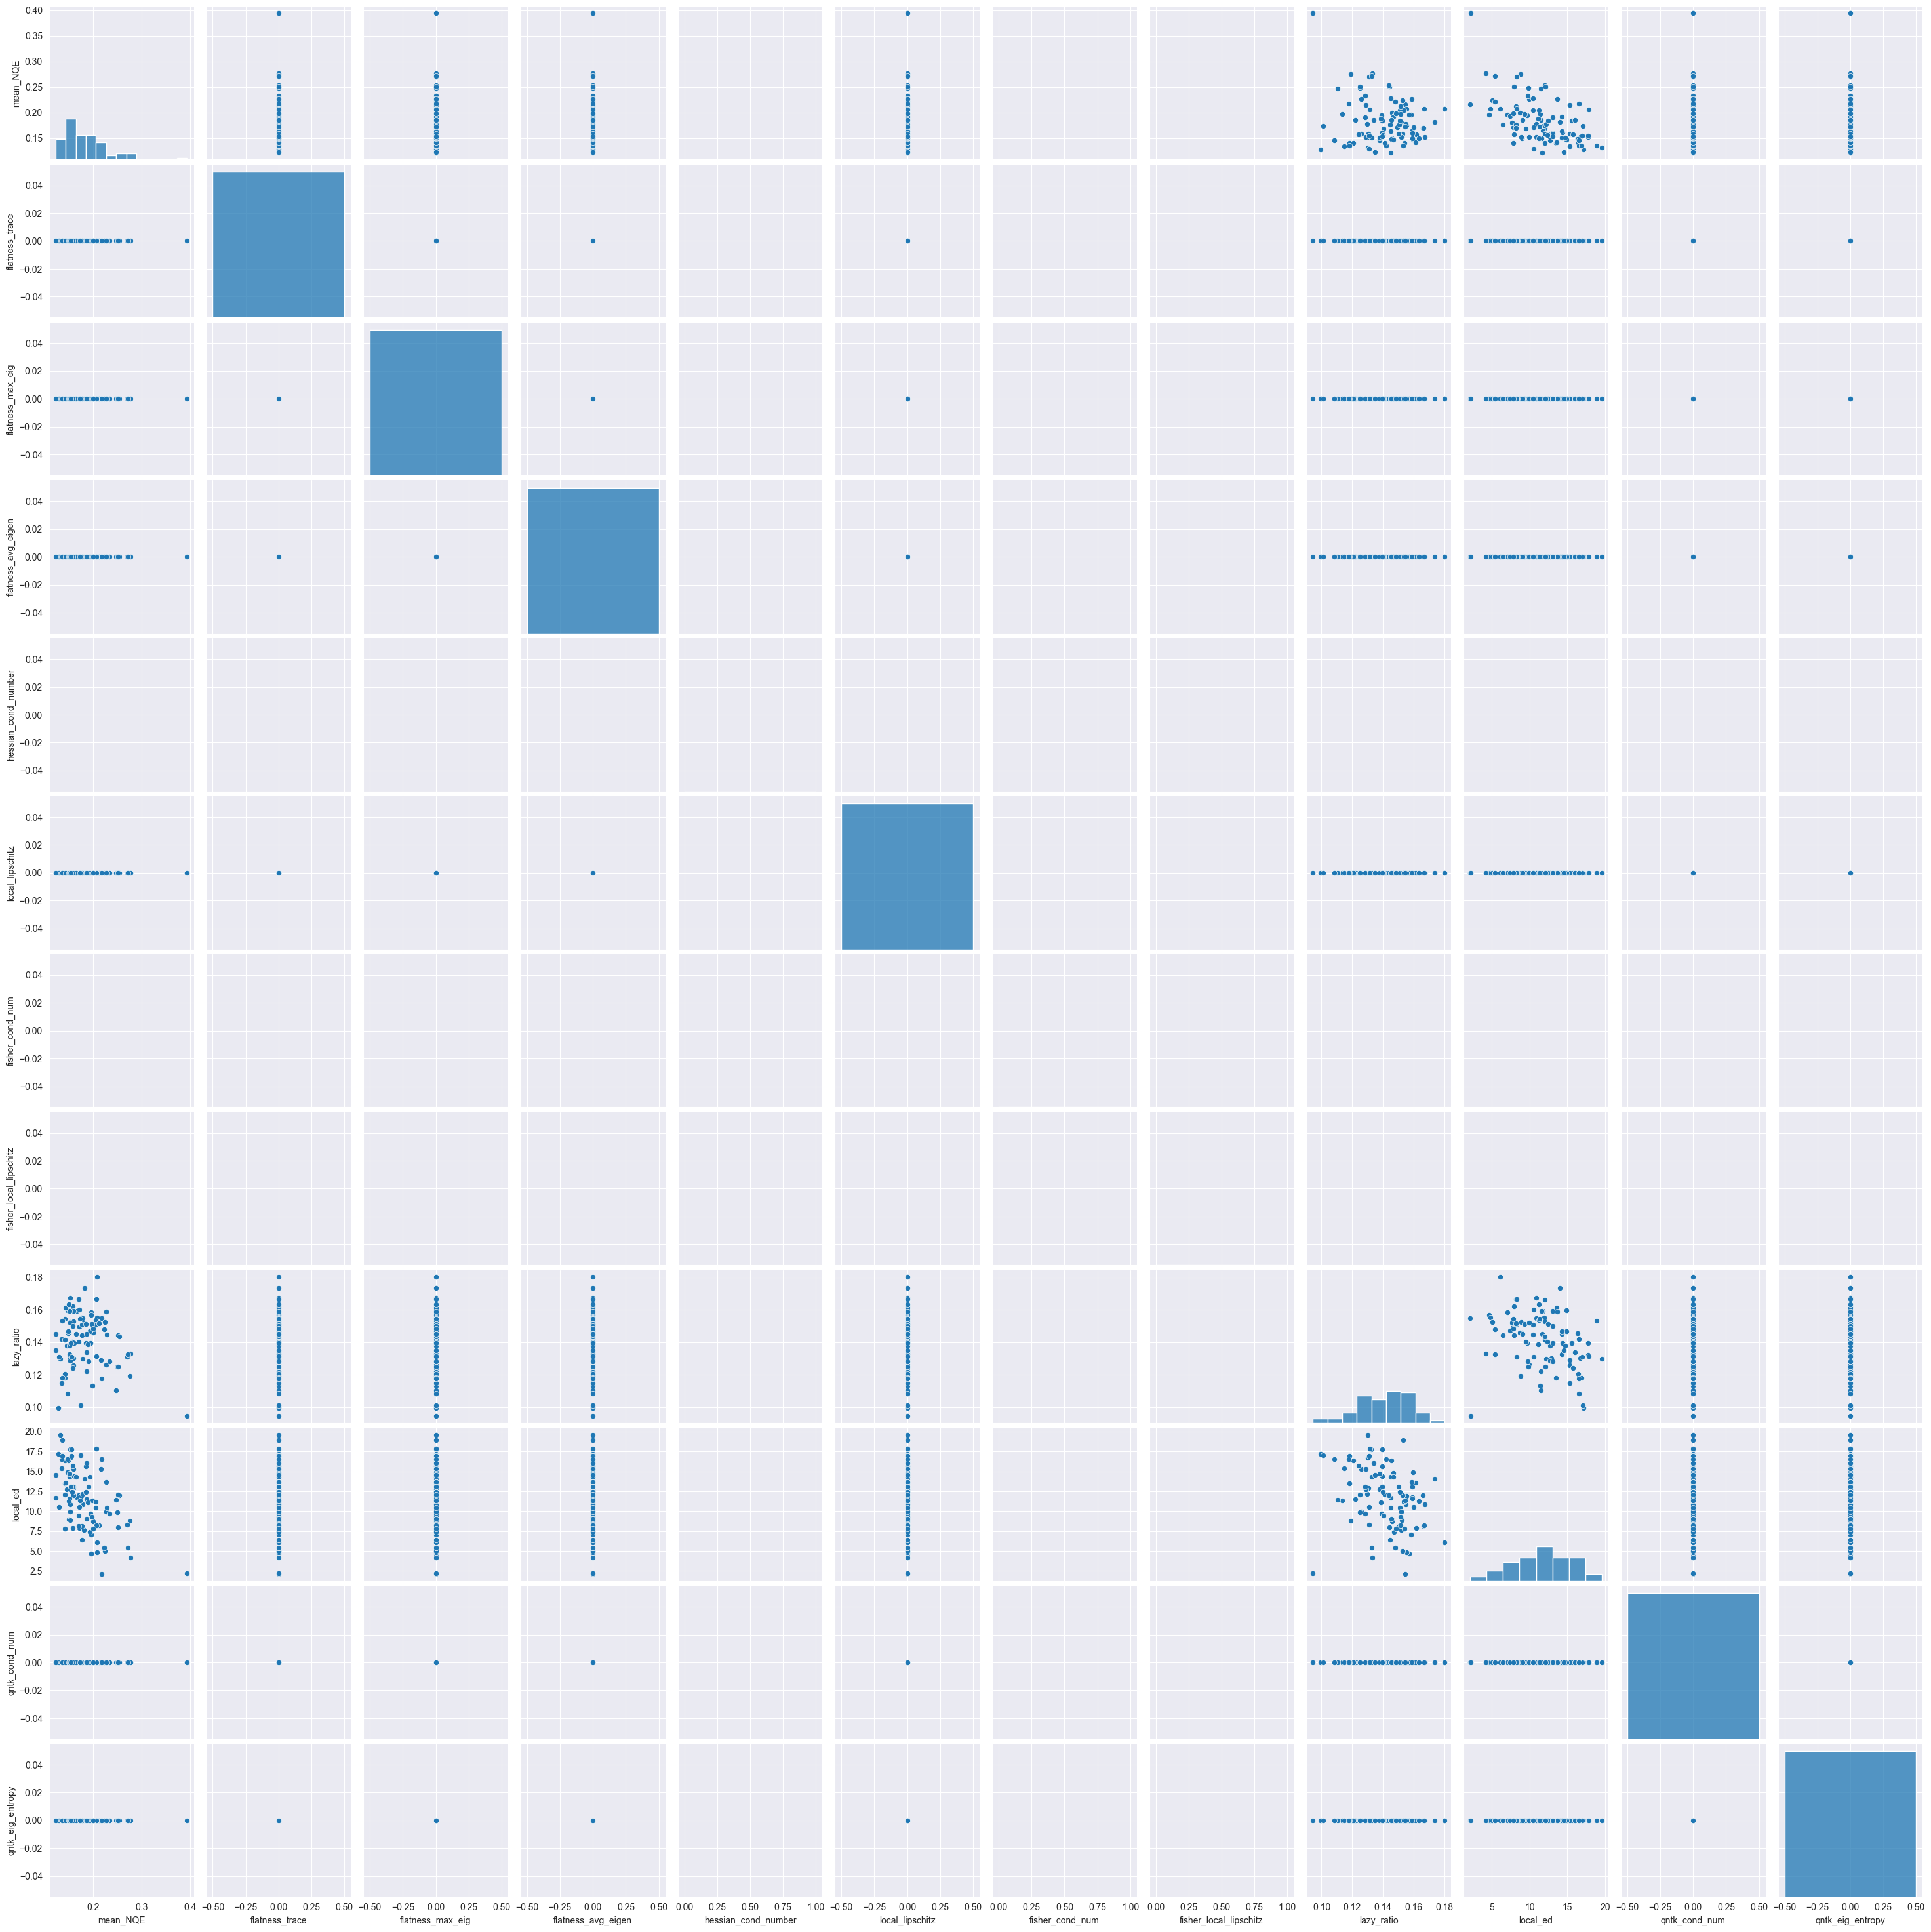

In [8]:
sns.pairplot(df)
plt.show()

In [10]:
df

,mean_NQE,flatness_trace,flatness_max_eig,flatness_avg_eigen,hessian_cond_number,local_lipschitz,fisher_cond_num,fisher_local_lipschitz,lazy_ratio,local_ed,qntk_cond_num,qntk_eig_entropy
0,0.140953,0.0,0.0,0.0,inf,0.0,inf,inf,0.117994,13.460436,0.0,-0.0
1,0.195874,0.0,0.0,0.0,inf,0.0,inf,inf,0.158467,7.027580,0.0,-0.0
2,0.152185,0.0,0.0,0.0,inf,0.0,inf,inf,0.132146,17.728996,0.0,-0.0
3,0.194503,0.0,0.0,0.0,inf,0.0,inf,inf,0.139342,9.691465,0.0,-0.0
4,0.216465,0.0,0.0,0.0,inf,0.0,inf,inf,0.154717,2.102973,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.153047,0.0,0.0,0.0,inf,0.0,inf,inf,0.139686,13.033317,0.0,-0.0
96,0.198831,0.0,0.0,0.0,inf,0.0,inf,inf,0.148372,7.814565,0.0,-0.0
97,0.394073,0.0,0.0,0.0,inf,0.0,inf,inf,0.094421,2.173020,0.0,-0.0
98,0.122186,0.0,0.0,0.0,inf,0.0,inf,inf,0.134879,14.531542,0.0,-0.0


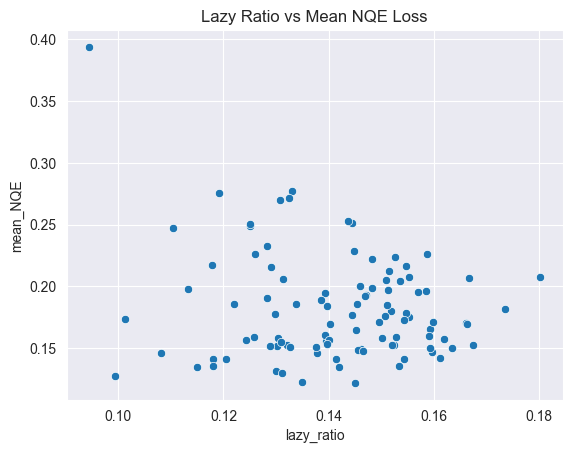

In [9]:
sns.scatterplot(x='lazy_ratio', y='mean_NQE', data=df)
plt.title('Lazy Ratio vs Mean NQE Loss')
plt.grid(True)
plt.show()